In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('profiles.csv')

In [293]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'diet_mapped',
       'sign_importance', 'drinks_mapped', 'pets_mapped', 'cluster_lables'],
      dtype='object')

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


# First, make a group of graphs showing the basic information - age distribution, sex, orientation, status 
- age distribution - line graph 
- sex - histogram 
- orientation - histogram with sex hue 
- status - histogram with sex / orientation in hue and split 

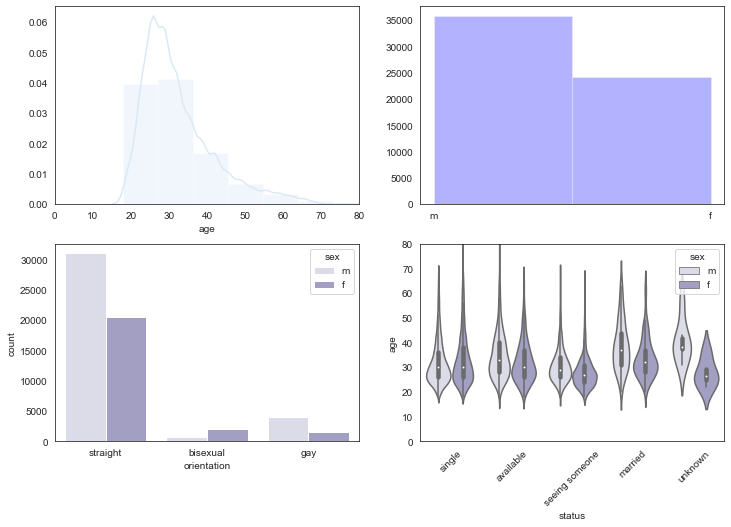

In [301]:
plt.figure(figsize = (12, 8))

ax1 = plt.subplot(2,2,1)
sns.set_palette('Purples', 3)
plt.xlim(0,80)
sns.distplot(df['age'], bins=10)

ax2 = plt.subplot(2,2,2)
plt.hist(df['sex'], bins =2, color = 'blue', alpha=0.3 )

ax3 = plt.subplot (2,2,3)
sns.countplot(data=df, x = 'orientation', y=None, hue = 'sex')

ax4 = plt.subplot (2,2,4)
ax4.set_xticklabels (df['status'], rotation = 45)
plt.ylim(0,80)
sns.violinplot(data=df, x = 'status', y='age', hue = 'sex')

# Create clusters using K means based on:
- diet 
- drink  
- pets 
- importance of zodiac 

Step 1: Augment data 

In [52]:
df['pets'].value_counts()

likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

In [53]:
pets_mapping = {

'dislikes cats':0,  
'dislikes dogs':0,    
'dislikes dogs and dislikes cats':0,    
    
'dislikes dogs and likes cats':1,  
'likes dogs and dislikes cats':1,     

'likes dogs':2, 
'likes dogs and likes cats':2, 
'likes cats':2,  
   
'has dogs and dislikes cats':3,           
'dislikes dogs and has cats':3,  
    
'has dogs':4,     
'likes dogs and has cats':4,                                        
'has dogs and likes cats':4,                       
'has cats':4,                            

'has dogs and has cats':5}

df['pets_mapped']=df.pets.map(pets_mapping)

                     

In [51]:
drinks_mapping = {'not at all ': 0, 
                 'rarely': 1, 
                 'socially': 2, 
                 'often': 3, 
                 'very often': 4,
                 'desperately': 5}
df['drinks_mapped']=df.drinks.map(drinks_mapping)

In [46]:
diet_mapping = {'mostly anything':0, 'anything':0, 'strictly anything':0, 
                'mostly other':1, 'strictly other': 1, 'other':1, 'mostly kosher': 1, 'mostly halal': 1, 'strictly halal': 1, 'strictly kosher': 1, 'halal':1, 'kosher':1, 
                'mostly vegetaria': 2, 'strictly vegetarian:':2, 'vegetarian':2, 
                'mostly vegan': 3, 'strictly vegan': 3, 'vegan': 3}

df['diet_mapped'] = df.diet.map(diet_mapping)

In [47]:
sign_importance_mapping = {
    "aries and it&rsquo;s fun to think about":2, "aries but it doesn&rsquo;t matter":0, "aries":1, "aries and it matters a lot":3, 
    "taurus and it&rsquo;s fun to think about":2, "taurus but it doesn&rsquo;t matter":0, "taurus":1, "taurus and it matters a lot":3,
    "gemini and it&rsquo;s fun to think about":2, "gemini but it doesn&rsquo;t matter":0, "gemini":1, "gemini and it matters a lot":3,
    "cancer and it&rsquo;s fun to think about":2, "cancer but it doesn&rsquo;t matter":0, "cancer":1, "cancer and it matters a lot":3,
    "leo and it&rsquo;s fun to think about":2, "leo but it doesn&rsquo;t matter":0, "leo":1, "leo and it matters a lot":3,
    "virgo and it&rsquo;s fun to think about":2, "virgo but it doesn&rsquo;t matter":0,"virgo":1, "virgo and it matters a lot":3,
    "libra and it&rsquo;s fun to think about":2, "libra but it doesn&rsquo;t matter":0, "libra":1, "libra and it matters a lot":3,
    "scorpio and it&rsquo;s fun to think about":2, "scorpio but it doesn&rsquo;t matter":0, "scorpio":1, "scorpio and it matters a lot":3,
    "sagittarius and it&rsquo;s fun to think about":2, "sagittarius but it doesn&rsquo;t matter":0, "sagisttarius":1, "sagittarius and it matters a lot":3,
    "capricorn and it&rsquo;s fun to think about":2, "capricorn but it doesn&rsquo;t matter":0,"capricorn":1,"capricorn and it matters a lot":3,
    "aquarius and it&rsquo;s fun to think about":2, "aquarius but it doesn&rsquo;t matter":0, "aquarius":1, "aquarius and it matters a lot":3,
    "pisces and it&rsquo;s fun to think about":2, "pisces but it doesn&rsquo;t matter":0,"pisces":1, "pisces and it matters a lot":3
}
df['sign_importance']= df.sign.map(sign_importance_mapping)

Step 2: Preprocess the data 

In [54]:
df.fillna(0, inplace=True)

In [57]:
from sklearn.preprocessing import MinMaxScaler

feature_data = df[['sign_importance', 'diet_mapped', 'drinks_mapped', 'pets_mapped']]

x = feature_data.values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

df1 = pd.DataFrame(x_scaled, columns = feature_data.columns)


In [58]:
df1.head()

,sign_importance,diet_mapped,drinks_mapped,pets_mapped
0,0.333333,0.000000,0.4,0.4
1,0.333333,0.333333,0.6,0.4
2,0.000000,0.000000,0.4,0.8
3,0.333333,0.666667,0.4,0.4
4,0.333333,0.000000,0.4,0.4


In [59]:
from sklearn.cluster import KMeans

KMeans uses integers so actually don't use a scaler on it. Keep in mind when augmenting data. 

In [63]:
rows_to_cluster = df.dropna(subset = ['sign_importance', 'diet_mapped', 'drinks_mapped', 'pets_mapped'])

In [80]:
#determine optimal number of clusters 

score = []
num_clusters = range (1,7)
for i in num_clusters: 
    classifier = KMeans (n_clusters = i)
    classifier.fit (rows_to_cluster[['sign_importance', 'diet_mapped', 'drinks_mapped', 'pets_mapped']])
    score.append(classifier.score(rows_to_cluster[['sign_importance', 'diet_mapped', 'drinks_mapped', 'pets_mapped']]))

print (score)

[-241968.02670736998, -139340.1907718463, -101177.69342529269, -81903.78967610297, -69948.19559225887, -59988.87702060193]


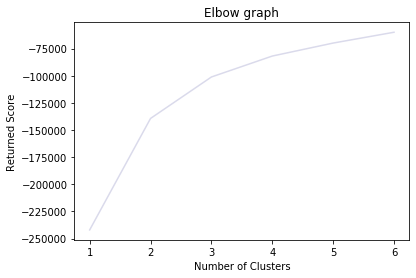

In [81]:
plt.plot(num_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Returned Score')
plt.title('Elbow graph')
plt.show()



In [82]:
#let's take 3 as the optimal number of clusters 

classifier=KMeans(n_clusters = 3)
classifier.fit(rows_to_cluster[['sign_importance', 'diet_mapped', 'drinks_mapped', 'pets_mapped']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
#We can look at the clustering 
print (classifier.cluster_centers_)

#Use sns.pairplot??! 

[[0.96755186 0.09306643 1.87468722 1.97687465]
 [0.64334718 0.07649228 1.73594064 0.05339058]
 [1.02750891 0.10748854 1.80889309 4.10137545]]


In [87]:
df['cluster_lables'] = classifier.labels_

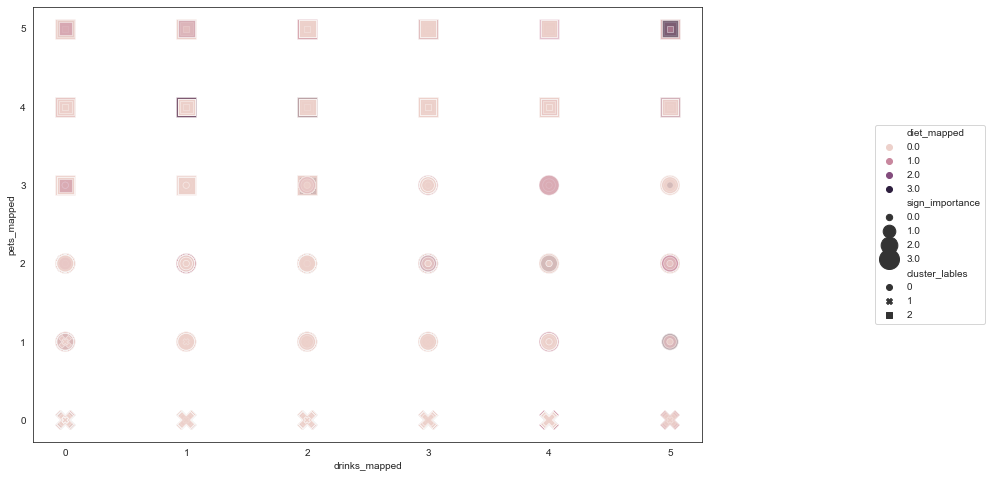

In [111]:
plt.figure(figsize = (12, 8))
sns.set_style('white')
sns.despine(right=True, top=True)
g= sns.scatterplot(data=df, x='drinks_mapped', y='pets_mapped', hue='diet_mapped', style='cluster_lables', size='sign_importance', sizes=(40,400), alpha = 0.5)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

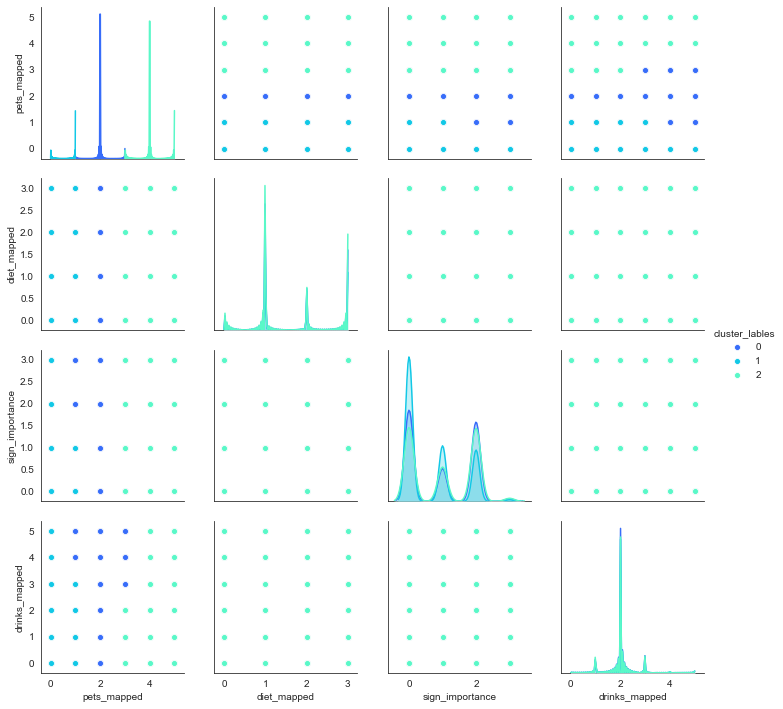

In [122]:
sns.set_palette('rainbow')
sns.pairplot(data=df, hue='cluster_lables', vars=['pets_mapped', 'diet_mapped', 'sign_importance', 'drinks_mapped'])

Pets seems to have the greatest impact as a variable ??

# Next, Create 3 dataframes 

In [112]:
cluster_zero_indices = []
cluster_one_indices = []
cluster_two_indices = []

for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
    else: 
        cluster_two_indices.append(i)

In [113]:
df_a = rows_to_cluster.iloc[cluster_zero_indices]
df_b = rows_to_cluster.iloc[cluster_one_indices]
df_c = rows_to_cluster.iloc[cluster_two_indices]


In [118]:
print(df_a.shape)
print(df_b.shape)
print(df_c.shape)

(24778, 35)
(21427, 35)
(13741, 35)


In [300]:
df_b['income'].value_counts() 

-1          18280
 20000        596
 100000       556
 80000        345
 40000        286
 50000        280
 30000        257
 70000        220
 150000       207
 60000        190
 1000000      126
 250000        67
 500000        17
Name: income, dtype: int64

In [276]:
def make_quad_plot (df, color1): 
    plt.figure(figsize = (12, 8))

    ax1 = plt.subplot(2,2,1) #rows, columns, position
    plt.xlim(0,80)
    sns.distplot(df['age'], bins=10)

    ax2 = plt.subplot(2,2,2)
    plt.hist(df['sex'], bins =2, color = color1, alpha=0.3 )

    ax3 = plt.subplot (2,2,3)
    sns.countplot(data=df, x = 'orientation', y=None, hue = 'sex')

    ax4 = plt.subplot (2,2,4)
    plt.ylim(0,80)
    ax4.set_xticklabels (df['status'], rotation = 45)
    sns.violinplot(data=df, x = 'status', y='age', hue = 'sex')

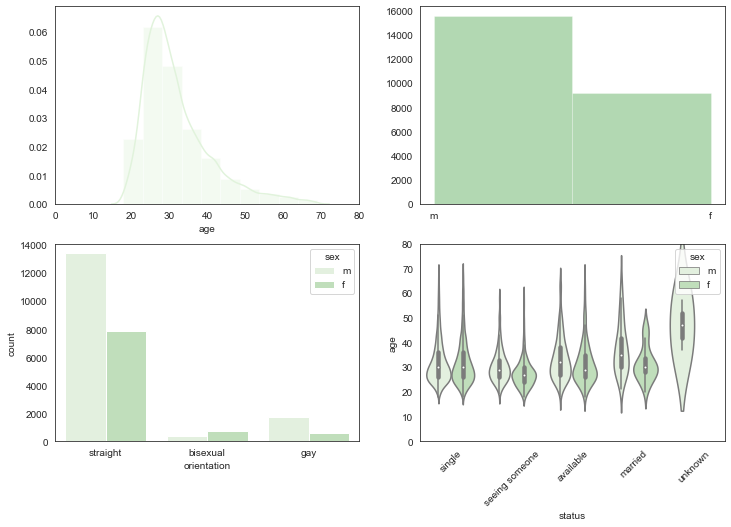

In [277]:
sns.set_palette("Greens")
make_quad_plot(df_a, 'green')

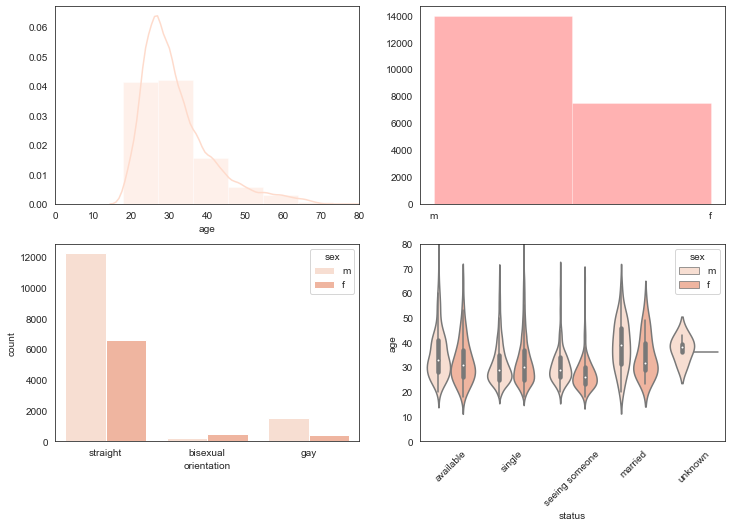

In [278]:
sns.set_palette("Reds")
make_quad_plot(df_b, 'red')

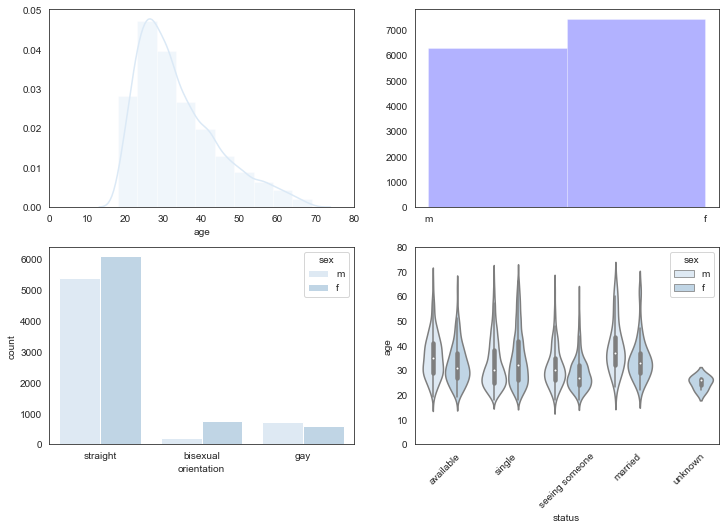

In [279]:
sns.set_palette("Blues")
make_quad_plot(df_c, 'blue')

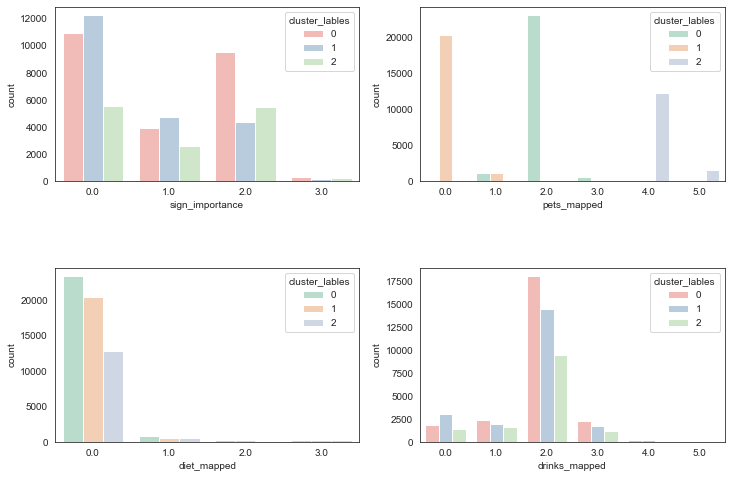

In [154]:
plt.figure(figsize = (12, 8))
plt.subplots_adjust(hspace =0.5)

ax1 = plt.subplot(2,2,1)
ax1.set_xticklabels (["It doesn't matter", "Neutral", "It's fun to think about", "It matters a lot"])
sns.countplot (data = df, x = 'sign_importance', hue = 'cluster_lables', palette = "Pastel1")

ax2 = plt.subplot(2,2,2)
sns.countplot (data = df, x = 'pets_mapped', hue = 'cluster_lables')

ax3 = plt.subplot (2,2,3)
sns.countplot (data = df, x = 'diet_mapped', hue = 'cluster_lables')

ax4 = plt.subplot (2,2,4)
ax4.set_xticklabels (['not at all ','rarely', 'socially','often','very often','desperately'])
sns.countplot (data = df, x = 'drinks_mapped', hue = 'cluster_lables', palette = "Pastel1")



Annoyingly can't get xtick labels to work right now but it seems to be a bug so going to ignore it for now. 

Tried with horizontal graphs but not easy to read

Could do pie charts/ nested pie for variation 

Some observations: 
- Group A has a significant number who think zodiac signs are important esp vs Group B. Group C has a fairly even distribution 
- Group A like pets, Group B dislike pets whilst Group C has pets 
- All have a mostly non-commital diet 
- All tend to drink socially while a somewhat larger portion of Group B are tea-totallers 

Overall pets and what they think of zodiac signs have a more significant impact on the clusters. 

To summarize before moving onto NLP analysis 
- Group A like to think about the zodiac, with some saying it matters a lot, and like pets but don't own them 
- Group B don't think zodiac is important and actively dislike pets, and some portion of them are teatotallers 
- Group C is quite evenly split on the zodiac, owns pets and quite a few both cats and dogs - skews female, a bit more non hetero and older 

# Analyze clusters using NLP on essays 
- Sadly the dataset didnt give us what each essay is. from the sample the following seem to be the most interesting
    - essay2: strengths 
    - essay3: what they like about themselves
    - essay6: their contribution to the world
    - essay7: social life / leisure time
    - essay8: a secret about them?! 
    - essay9: what they would say to a date 
    
Do bag of words / tfidf on 2,3 and 6

pull themes on 7

9 definitely some kind of vocabulary analysis 

Text gen a 'typical' essay for each typology !!

In [203]:
def clean_column(data):
    if data is not None:
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.str.lower()
        data = re.sub('re:', '', str(data))
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html 
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
        
        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'


#adding str to the first two actions to make it work with this dataset. Still not sure what the issue is vs the others

In [232]:
def sort_list(lst): 
    counts = collections.Counter(lst)
    new_list = sorted(lst, key=lambda x: (counts[x], x), reverse=True)
    return new_list

In [222]:
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import collections 
stop_words = set(stopwords.words('english')) 

# Make a function that cleans, removes stopwords, toknizes and sorts 
def process_text (column): 
    clean_text = clean_column (column)
    clean_text = word_tokenize(clean_text)
    clean_text = [word for word in clean_text if word not in stop_words]
    clean_text = sort_list(clean_text)
    word_counts = collections.Counter (clean_text)
    return clean_text, word_counts

#clean_column and sort_list are defined above 

In [231]:
def word_graph (counts, what_color):  #input what_color with quotation marks 
    words_df = pd.DataFrame(counts.most_common(20), columns=['words', 'count'])
    words_df.sort_values(by='count').plot.barh(x='words', y='count', color = what_color)

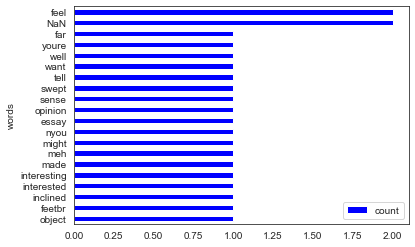

In [233]:
a9, a9_counts = process_text (df_a['essay9'])
word_graph (a9_counts, 'blue')

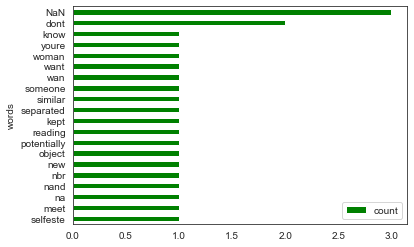

In [234]:
b9, b9_counts = process_text (df_b['essay9'])
word_graph (b9_counts, 'green')

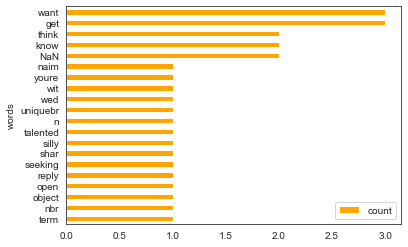

In [239]:
c9, c9_counts = process_text (df_c['essay9'])
word_graph (c9_counts, 'orange')

At this point, the key words per group look pretty interesting however the sets are too small to merit graphing. 
Need to come up with another way of presenting 
Also experiment with combining columns -- Easist solution rn seems to be combining counter objects with '+'

# Text genn should be a new notebook given setup requirements, also a new environment?? 
# Need to save text output to .txt 

In [257]:
np.savetxt('groupa_essay3.txt', df_a.essay3, fmt='%s', delimiter = '\n')
# ftm setting to allow dataframe object to be written to text file 

In [258]:
np.savetxt('groupb_essay3.txt', df_b.essay3, fmt='%s', delimiter = '\n')
np.savetxt('groupc_essay3.txt', df_c.essay3, fmt='%s', delimiter = '\n')


# For fun, run prediction score for zodiac sign using data used in K means ??